In [1]:
!pip install pingouin
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.7 MB/s eta 0:00:00


In [2]:
red_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality-red.csv", delimiter=";")
red_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
white_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality-white.csv", delimiter=";")
white_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

<Axes: >

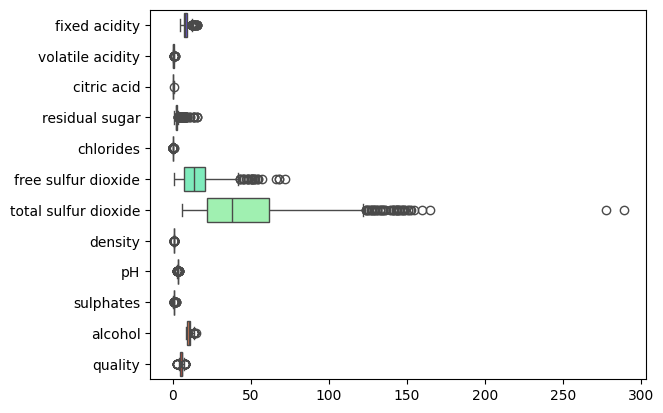

In [4]:
sns.boxplot(data=red_df, orient="h", palette="rainbow")

(np.float64(0.0), np.float64(300.0), np.float64(11.5), np.float64(-0.5))

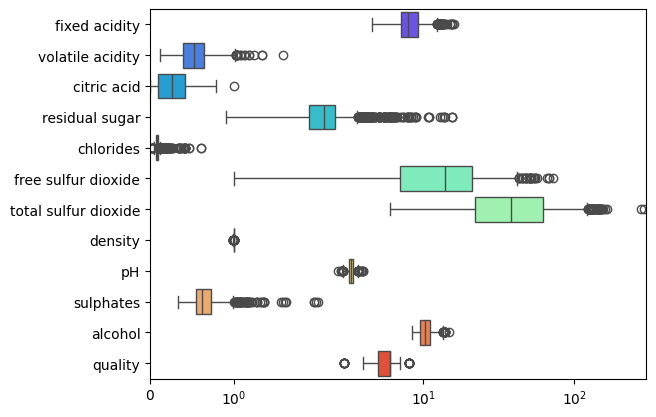

In [5]:
log_box = sns.boxplot(data=red_df, orient="h", palette="rainbow")
log_box.set_xscale("symlog")
log_box.axis(xmin=0, xmax=300)

# Rescaling the data
As we can see, the means of the data vary a lot. This happens because the data is on different scales, meaning that different units are used to measure the different features. It is possible to **rescale the data**, which means centering the means of the data. A common method is to standardize variables by subtracting the mean and dividing by the variance, thus making $\mu=0$ and $\sigma=1$ . Scikit-learn has a module for preprocessing and we will use it in the next example.

For more information, please visit  [Scikit-learns's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 'Standard Scaler')

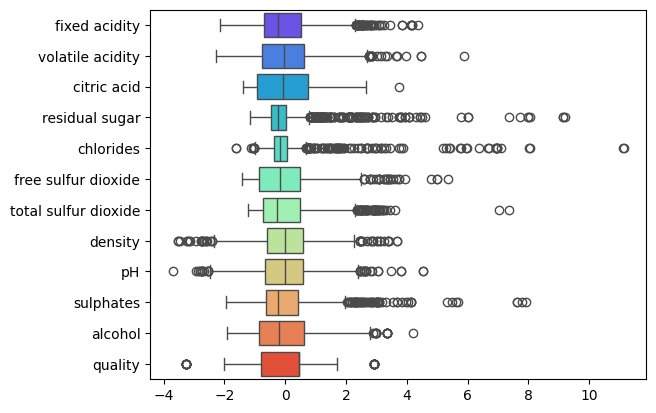

In [6]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(red_df) # fit_transform function from StandardScaler
df_scaled = pd.DataFrame(data=scaled, columns=red_df.columns)
ax = sns.boxplot(data=df_scaled, orient="h", palette="rainbow")

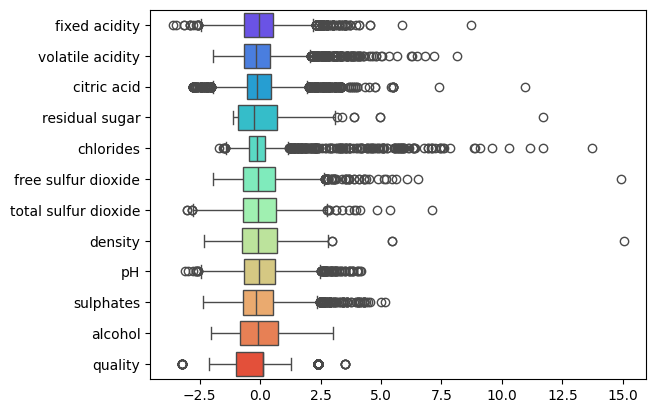

In [7]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(white_df) # fit_transform function from StandardScaler
df_scaled = pd.DataFrame(data=scaled, columns=white_df.columns)
ax = sns.boxplot(data=df_scaled, orient="h", palette="rainbow")

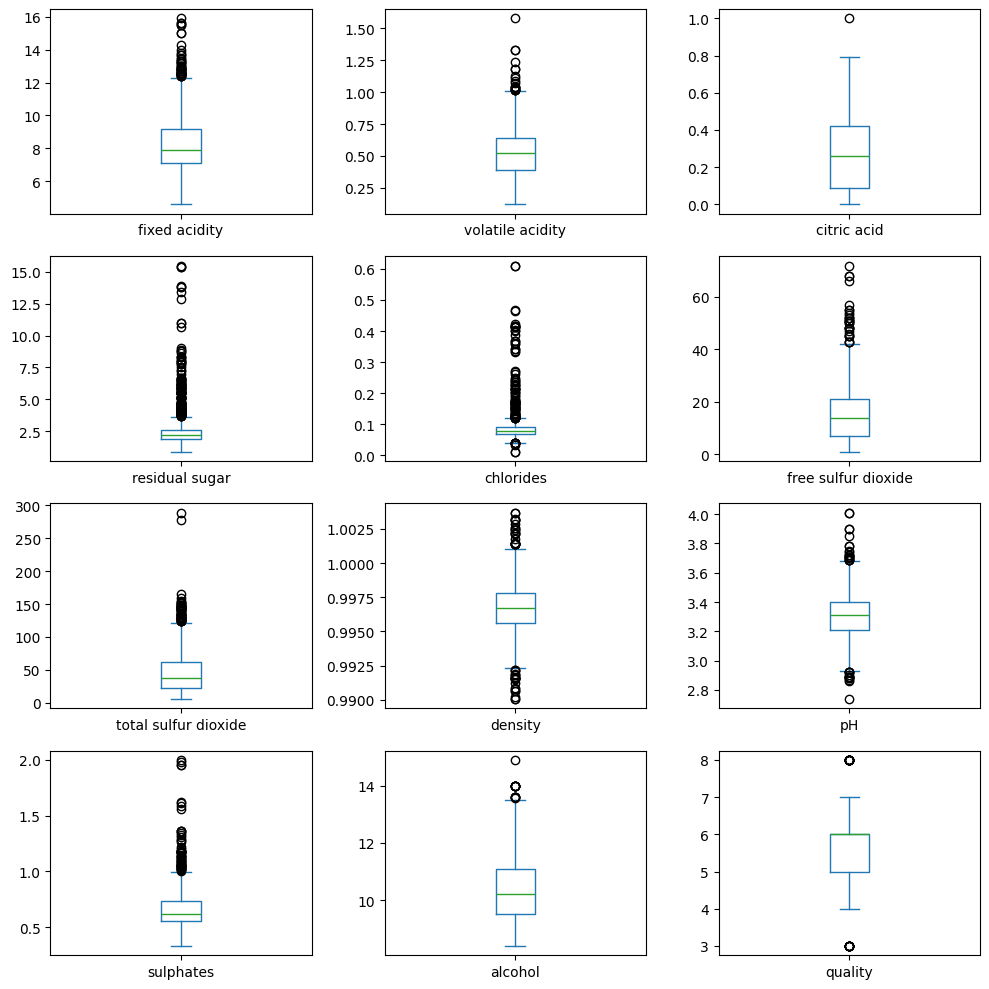

In [8]:
# Another way to visualize the boxplots is as a grid. In this case, we use a function of the Pandas library called plot().
red_df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))
plt.tight_layout()

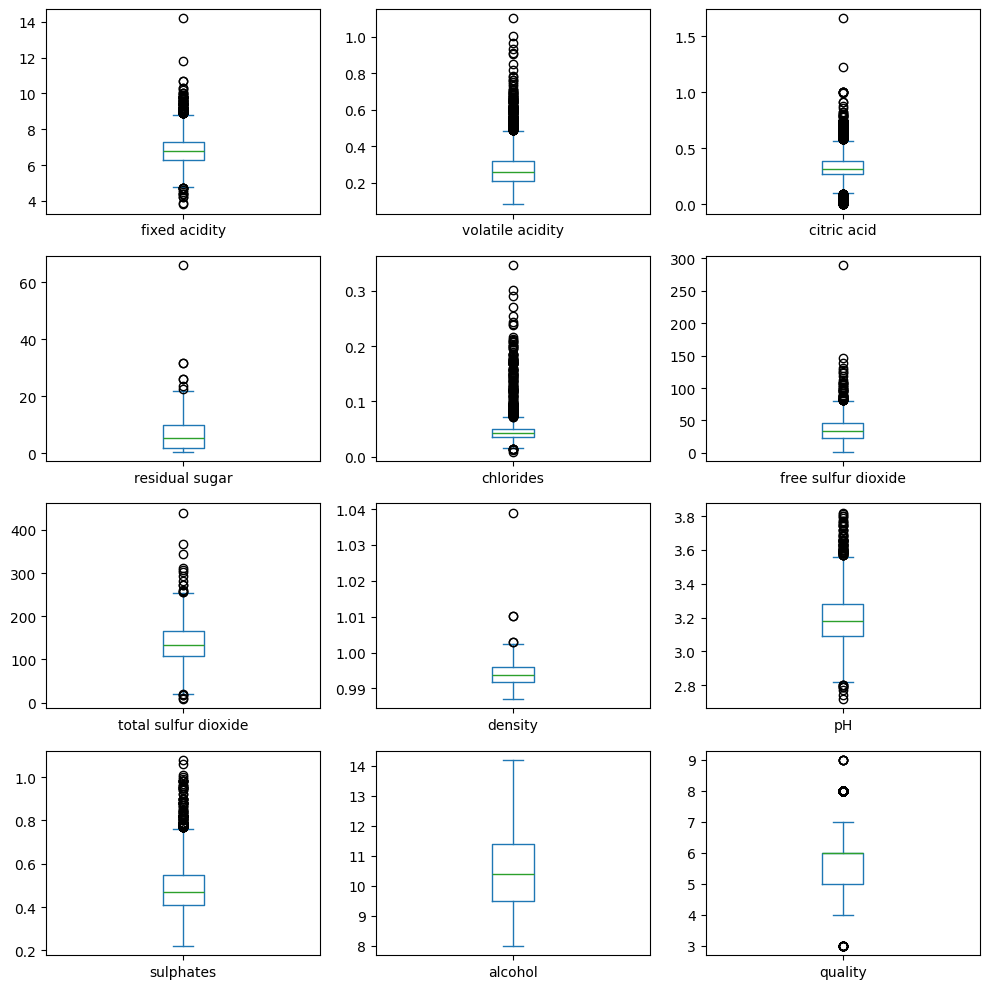

In [9]:
white_df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))
plt.tight_layout()

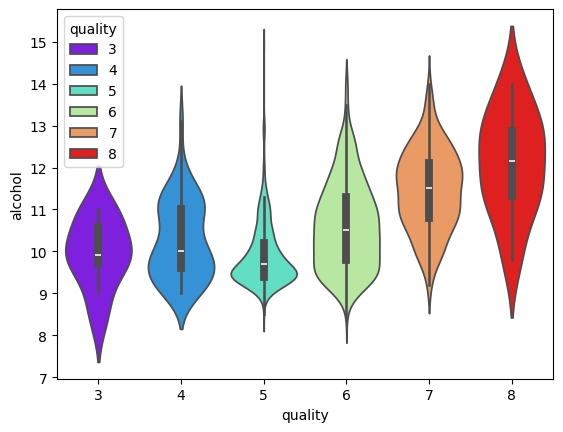

In [10]:
sns.violinplot(x="quality", y="alcohol", data=red_df, hue="quality" ,palette="rainbow")
plt.show()

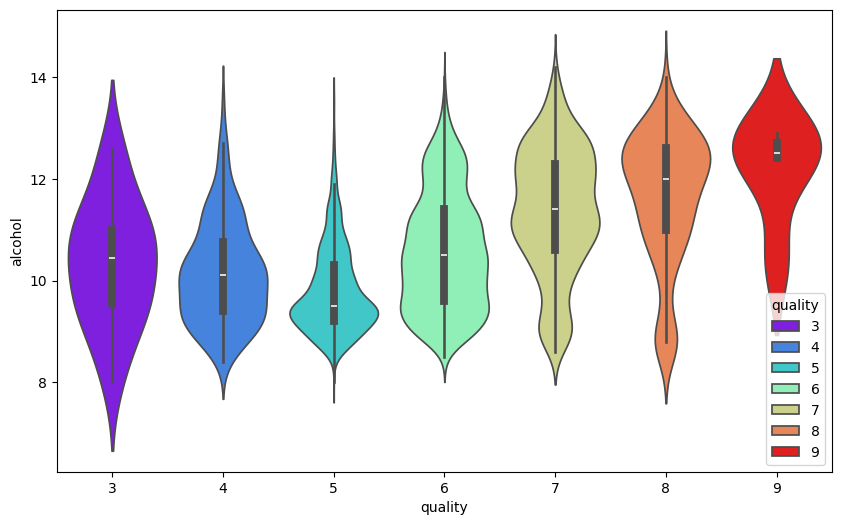

In [11]:
plt.figure(figsize=(10,6))
sns.violinplot(x="quality", y="alcohol", data=white_df, hue="quality" ,palette="rainbow")
plt.show()

# Correlation Analysis
Another important aspect to understand our data is to study the correlation between variables.If we want to see the correlation between pH and fixed acidity, we can make this scatter plot and marginal histograms using `sns.jointplot`

Text(0.1, 0.9, '$\\rho = -0.683, p = 0.000$')

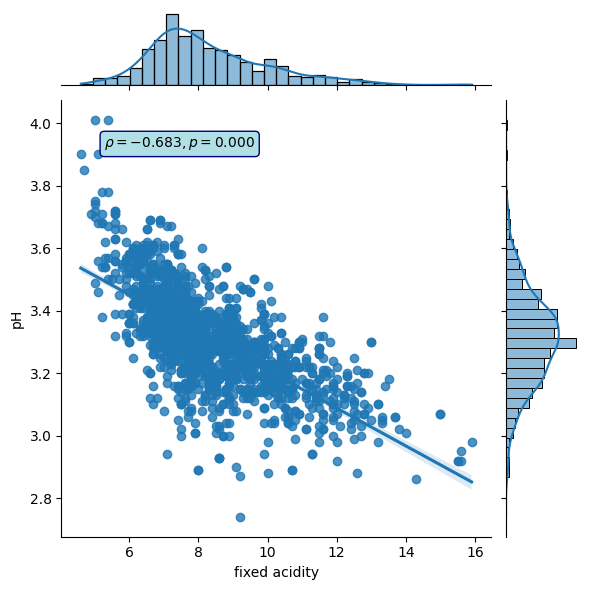

In [12]:
import scipy.stats as stats
joint_plt = sns.jointplot(y='pH', x='fixed acidity', data=red_df, kind='reg',)

r, p = stats.pearsonr(red_df['fixed acidity'], red_df['pH'])
joint_plt.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})


At first glance, as the slope is not very steep, it can be inferred then, that the relation is not exactly linear and the correlation is low. So we can calculate the correlation between two variables with _Pearson correlation coefficient_ and the _p-value_.

The _Pearson correlation coefficient_ ($\rho$) allows us to easily observe linear dependencies between two data sets. A value of +1 means total positive linear correlation, 0 means no linear correlation, and −1, total negative linear correlation. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases y decreases.

The _p-value_ roughly indicates the probability that uncorrelated datasets have a _Pearson correlation coefficient_ at least as extreme as the determined for these datasets. If this probability is lower than the 5% (P<0.05), the correlation coefficient is statistically significant.

**Be careful as correlation does not imply causation. When two variables are correlated, there may or may not be a causative connection, and this connection may moreover be indirect.**

In [13]:
# General perason Coefficient function
from scipy.stats import pearsonr
def get_corr(col1, col2, temp_df):
    pearson_corr, p_value = pearsonr(temp_df[col1], temp_df[col2])
    print("Correlation between {} and {} is {:.2f}".format(col1, col2, pearson_corr))
    print("P-value of this correlation is {}".format(p_value))
get_corr('fixed acidity', 'pH', red_df)
get_corr('fixed acidity', 'pH', white_df)

Correlation between fixed acidity and pH is -0.68
P-value of this correlation is 4.06303403984401e-220
Correlation between fixed acidity and pH is -0.43
P-value of this correlation is 4.842014875995281e-215


It makes sense that the fixed acidity has a negative correlation with the pH ( $\rho$ = -0.68 ) (we verified this by doing a scatterplot a few cells back). Although it's not completely linear, as we would expect from our chemistry knowledge.

## Heat Map

<Axes: >

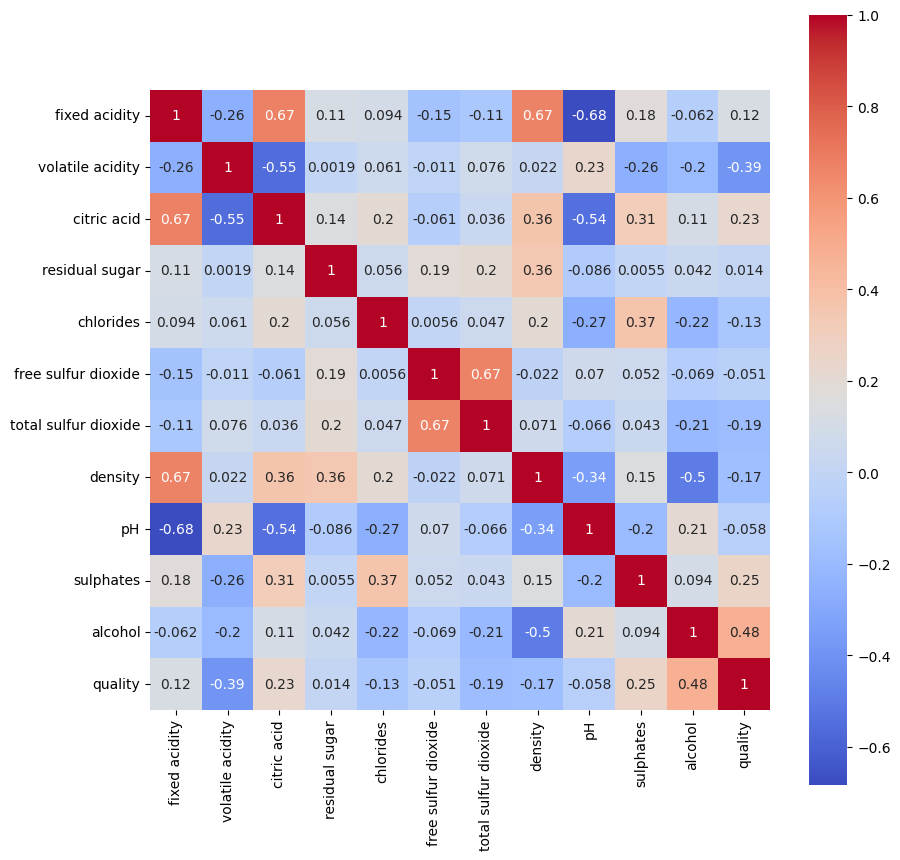

In [14]:
# We calculate correlation with Pearson's coefficient using Pandas:
correlation = red_df.corr(method='pearson')
# We create a new figure using matplotlib and set the figure size:
fig=plt.gcf()
fig.set_size_inches(10,10)
# Heatmap of the correlation using Seaborn:
sns.heatmap(correlation, annot=True,square=True, cmap="coolwarm")

<Axes: >

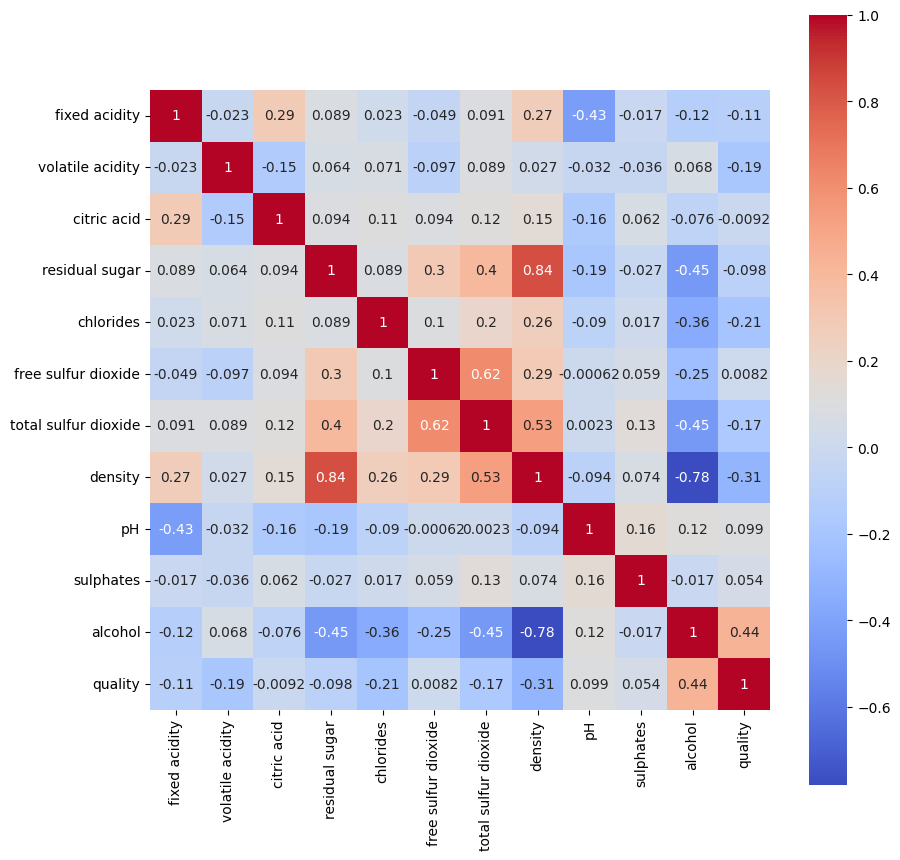

In [15]:
# We calculate correlation with Pearson's coefficient using Pandas:
correlation = white_df.corr(method='pearson')
# We create a new figure using matplotlib and set the figure size:
fig=plt.gcf()
fig.set_size_inches(10,10)
# Heatmap of the correlation using Seaborn:
sns.heatmap(correlation, annot=True,square=True, cmap="coolwarm")

When several variables are compared at the same time it's difficult to grasp how the data behaves, so we could add the values of each comparison to the heatmap and plot only the lower triangular correlation matrix (since it's a symmetrical graph, and the information in the upper triangle is redundant).

<Axes: >

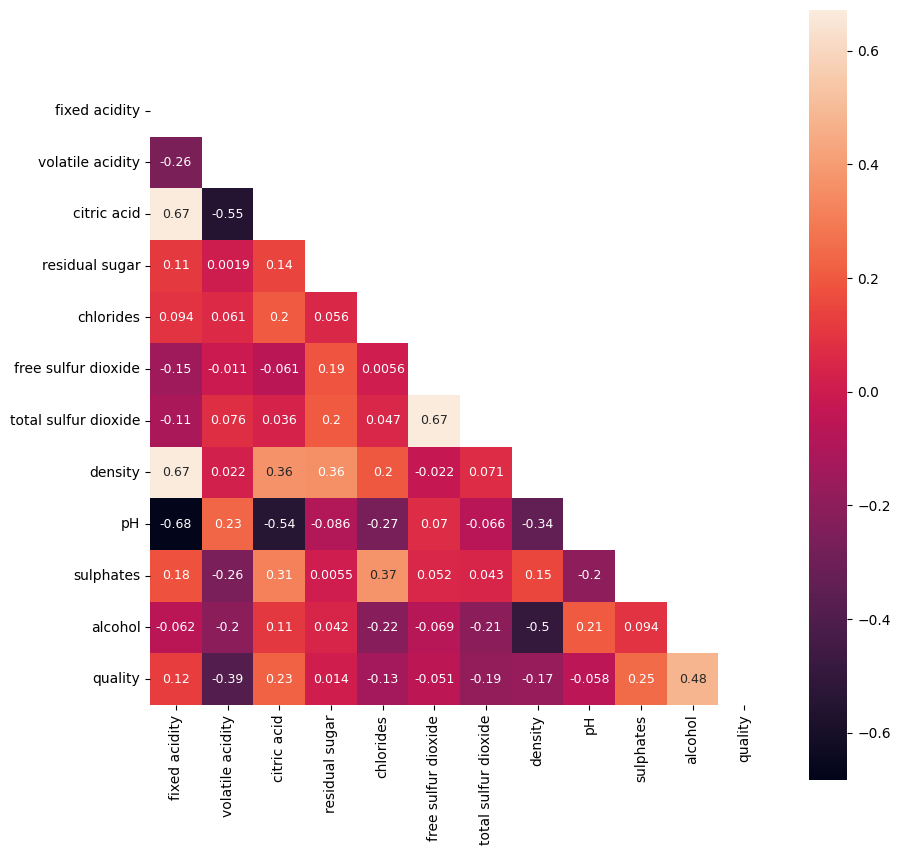

In [16]:
correlation = red_df.corr()
# np.triu is a numpy function that  takes 2d-numpy array as input and gives the upper triangle of the array
mask_triu = np.triu(correlation)
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask_triu,square=True,annot=True, annot_kws={"size":9})

## Pair Plot
Another way to visualize the correlation between variables is to plot a correlation matrix with the seaborn function pairplot . For example, here we plotted the correlation of four of the columns in the dataset.



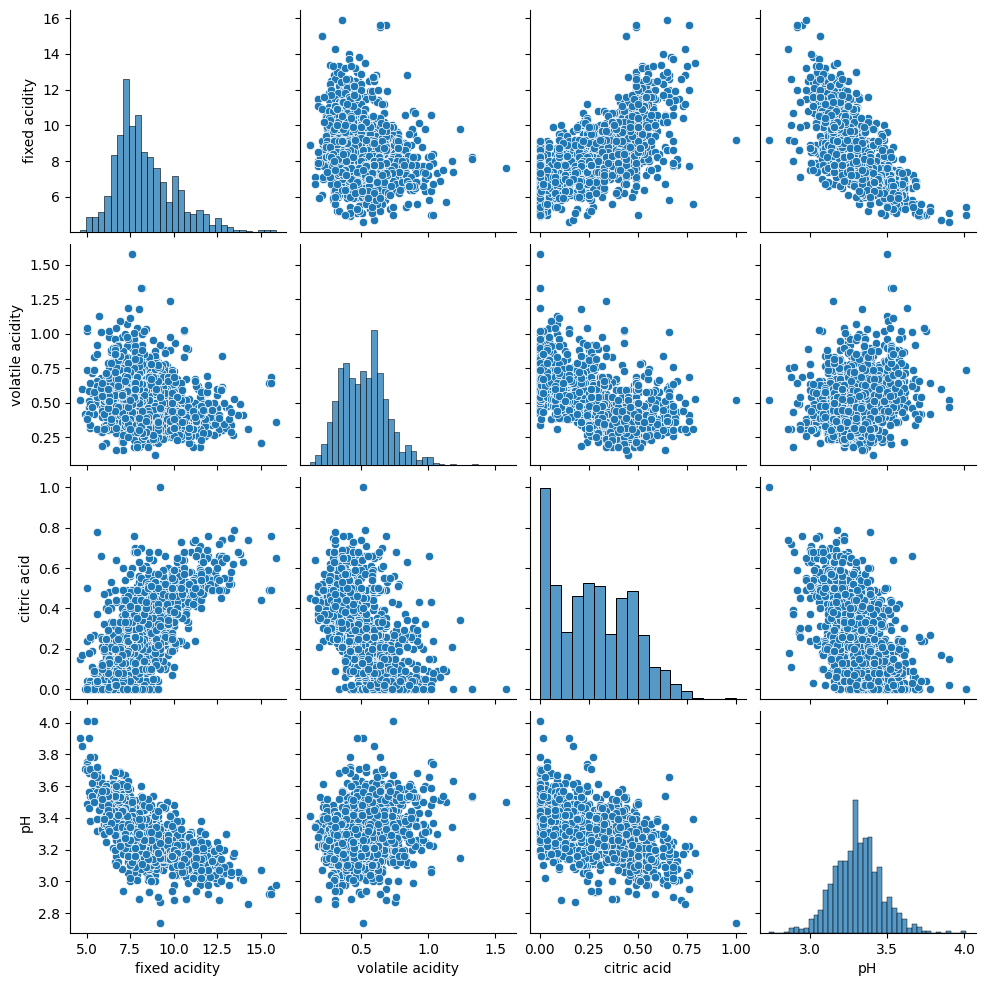

In [17]:
sns.pairplot(red_df[['fixed acidity','volatile acidity','citric acid', 'pH']], corner=False) #corner=True hides the upper portion of the matrix

# Variable Reduction
A very useful way to visualize data with multiple variables are variable reduction techniques. Which reduce the multiple dimensions of the problem to just two or three, in order to make a plot that allows us to visualize the overall distribution of the variables.

We will concatenate the datasets of red and white wine for the Purposes of visualization.


In [18]:
red_df["hue"] = "red"
white_df["hue"]= "white"
df_wine = pd.concat([red_df, white_df], ignore_index=True)

## PCA (Principal Components Analysis)
The PCA algorithm defines a **new** set of coordinates (components) from a large dataset with multiple variables, and transforms the values into the new coordinates. These coordinates are defined in order to maximize the variance by some scalar projection. The components are arranged according to their original variance, that's why this technique is useful for reducing the dimensions of a dataset.

After loading the dataset, we import the **Standard Scaler** from **sklearn.preprocessing** and **PCA function** from **sklearn.decomposition**. Scaling the data is important as not every variable has the same range. So, we create the PCA object and define the number of components. Using `StandardScaler()` and `fit_transform()`,  we can fit the new variables (components) and transform their values into the new variables. For more information visit [SciKit-Learn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html "sklearn.decomposition.PCA").

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data_pca = df_wine.copy()
data_pca = data_pca.drop(labels = ['quality', 'hue'],axis = 1)
#What StandardScaler() does is scaling the data. The fit.transform() module fits these new values to the data,
#and stores them, replacing the old values.
data_pca = StandardScaler().fit_transform(data_pca)
#Apply PCA on the transformed (scaled and centered) data:
pca = PCA(n_components=3)
pca_results = pca.fit_transform(data_pca)
pca_results

array([[-3.20599617,  0.41652332, -2.72223659],
       [-3.03905081,  1.10746213, -2.04695235],
       [-3.07189347,  0.87896444, -1.74257961],
       ...,
       [ 0.5711325 , -0.72266165,  0.09146896],
       [ 0.09005243, -3.54577991,  0.14119458],
       [ 0.51257566, -2.89104008,  0.73941657]])

<Axes: title={'center': '2 Component PCA'}, xlabel='Component 1', ylabel='Component 2'>

<Figure size 640x480 with 0 Axes>

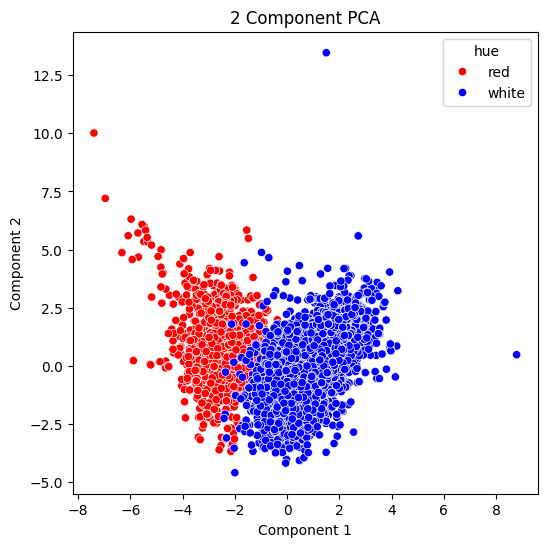

In [27]:
pca_dataset = pd.DataFrame(data = pca_results, columns = ['component1', 'component2','component3'] )
pca_dataset['hue']=df_wine['hue']
plt.figure()
plt.figure(figsize=(6,6))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
sns.scatterplot(x = pca_dataset['component1'], y = pca_dataset['component2'], hue=pca_dataset['hue'],
                alpha=1,palette=["red", "blue"])

## t-SNE (t-distributed Stochastic Neighbor Embedding)

t-SNE is an algorithm that determines the similarity between pairs of points in a high dimensional space and replicates this similarity in a low dimensional space based on the probability distribution of the distances.

We can make this dimension reduction with the **scikit learn** module and then plot it with **seaborn**. First, we make a copy of the dataset, then, we drop the columns for _quality_ and _wine_ in this copy, as we won't be using them to make the t-SNE, but we will take the _wine_ column into account for the plot, for the purpose of visualization.

To make the dimension reduction we have to create a t-SNE object and then use the `tsne.fit_transform` function on it with our dataset copy. For more information visit the [this section of SciKit-Learn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html "sklearn.manifold.TSNE").


In [28]:
from sklearn.manifold import TSNE
data_tsne = df_wine.copy()
data_tsne = data_tsne.drop(labels = ['quality', 'hue'],axis = 1)
data_tsne = StandardScaler().fit_transform(data_tsne)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_tsne)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.015s...
[t-SNE] Computed neighbors for 6497 samples in 2.062s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.733566
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.721138
[t-SNE] KL divergence after 300 iterations: 2.498364


<Figure size 640x480 with 0 Axes>

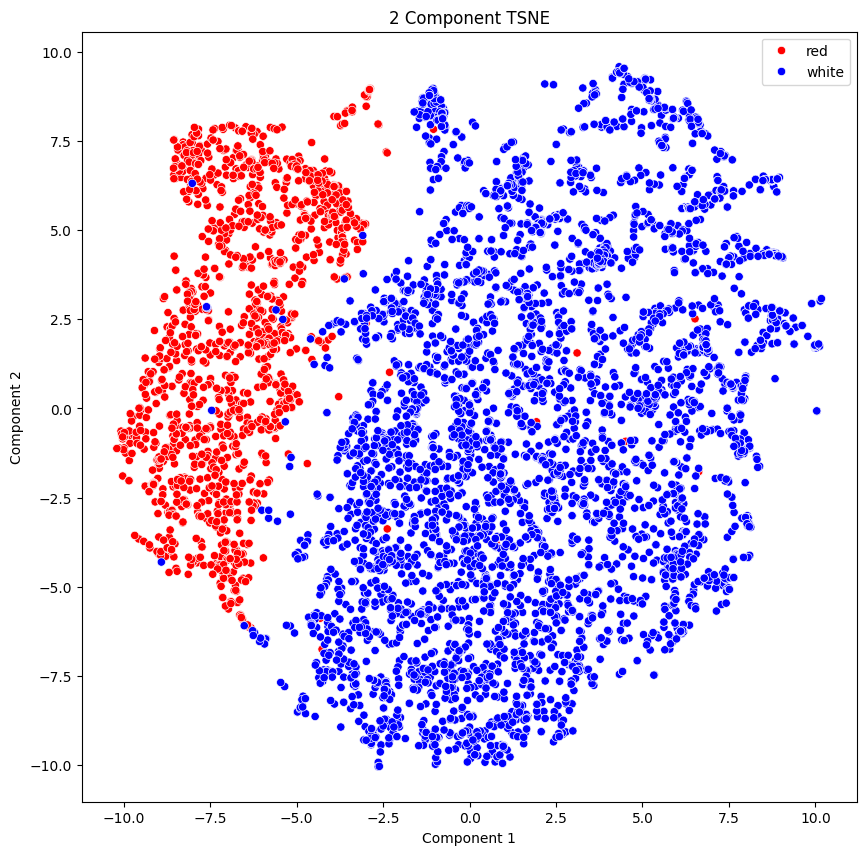

In [31]:
# Finally, we can create a DataFrame using the t-SNE results, add the hue column and, plot it with seaborn.
tsne_dataset = pd.DataFrame(data = tsne_results, columns = ['component1', 'component2'] )
tsne_dataset['hue']=df_wine['hue']
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component TSNE')
sns.scatterplot(x = tsne_dataset['component1'], y = tsne_dataset['component2'], hue=tsne_dataset['hue'],
                alpha=1, palette=["red", "blue"])
plt.legend()

## UMAP (Uniform Manifold Approximation and Projection)
UMAP is a new technique published in 2018 for dimension reduction. This is an alternative to t-SNE for visualization, that preserves more of the global structure with better run time performance. The data is modeled by a manifold with a fuzzy topological structure. The small representation (or embedding) is found by searching for a low dimensional projection of the data that has the closest possible equivalent fuzzy topological structure. For more information visit the [ UMAP documentation](https://umap-learn.readthedocs.io/en/latest/basic_usage.html "How to Use UMAP").

In [35]:
import umap

data_umap = df_wine.copy()
data_umap = data_umap.drop(labels = ['quality', 'hue'],axis = 1)
scaled_data_umap = StandardScaler().fit_transform(data_umap) #We convert each feature into z-scores (number of standard deviations from the mean) for comparability.
umap = umap.UMAP()
umap_results = umap.fit_transform(scaled_data_umap)
umap_results

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([[ 3.3995454, -0.7924986],
       [ 2.9798598, -1.0209427],
       [ 2.7860312, -0.9349298],
       ...,
       [10.132394 ,  5.829893 ],
       [ 6.826871 , 10.211086 ],
       [ 7.8369637, 10.194683 ]], dtype=float32)

<Axes: title={'center': '2 Component UMAP'}, xlabel='Component 1', ylabel='Component 2'>

<Figure size 640x480 with 0 Axes>

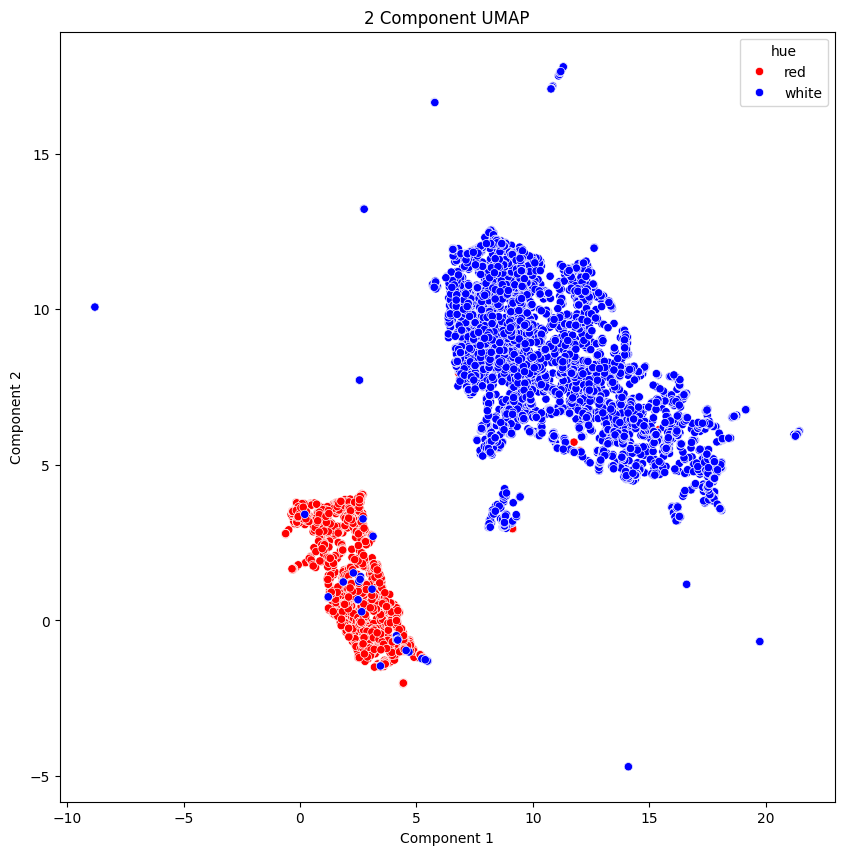

In [34]:
umap_dataset = pd.DataFrame(data = umap_results, columns = ['component1', 'component2'] )
umap_dataset['hue']=df_wine['hue']
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component UMAP')
sns.scatterplot(x = umap_dataset['component1'], y = umap_dataset['component2'], hue = umap_dataset['hue'],
                alpha=1,palette=["red", "blue"])

# Advanced Plots

## Interactive plots with Widgets
An interesting option is to make interactive graphs that allow us to explore the data. We will cover how different principal components (P.Cs) allow us to separate the data into different clusters. In this example, we calculate the first four principal components and set them in the axes of a 2D plot. As the P.Cs increase, the separation between red and white wines increases.

In [42]:
import ipywidgets as widgets
from IPython.display import display

data_pca = df_wine.copy()
data_pca = data_pca.drop(labels = ['quality','hue'],axis = 1)
data_pca = StandardScaler().fit_transform(data_pca)
pca = PCA(n_components=4)
pca_results = pca.fit_transform(data_pca)
columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4']
pca_dataset = pd.DataFrame(data = pca_results, columns = columns )
pca_dataset['hue']=df_wine['hue']

Xaxes =widgets.Dropdown(options=['principal component 1', 'principal component 2','principal component 3', 'principal component 4'],disabled=False)
Yaxes =widgets.Dropdown(options=['principal component 2', 'principal component 1','principal component 3', 'principal component 4'],disabled=False)

def PCvis(PC_X, PC_Y):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel(PC_X, fontsize = 15)
    ax.set_ylabel(PC_Y, fontsize = 15)
    ax.set_title('2 Component PCA', fontsize = 20)
    targets = ['red', 'white']
    colors = ['r', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = pca_dataset['hue'] == target
        ax.scatter(pca_dataset.loc[indicesToKeep, PC_X]
               , pca_dataset.loc[indicesToKeep, PC_Y]
               , c = color
               , alpha=0.3)
    ax.legend(targets)
    ax.grid()

widgets.interact(PCvis,PC_X=Xaxes,PC_Y=Yaxes)

interactive(children=(Dropdown(description='PC_X', options=('principal component 1', 'principal component 2', …

<function __main__.PCvis(PC_X, PC_Y)>

## 3D plots with matplotlib
Another advanced plot that can be made is a 3D plot, in which we can see the relation beetween three diferent variables at the same time. In this case, we plotted three PCA components.

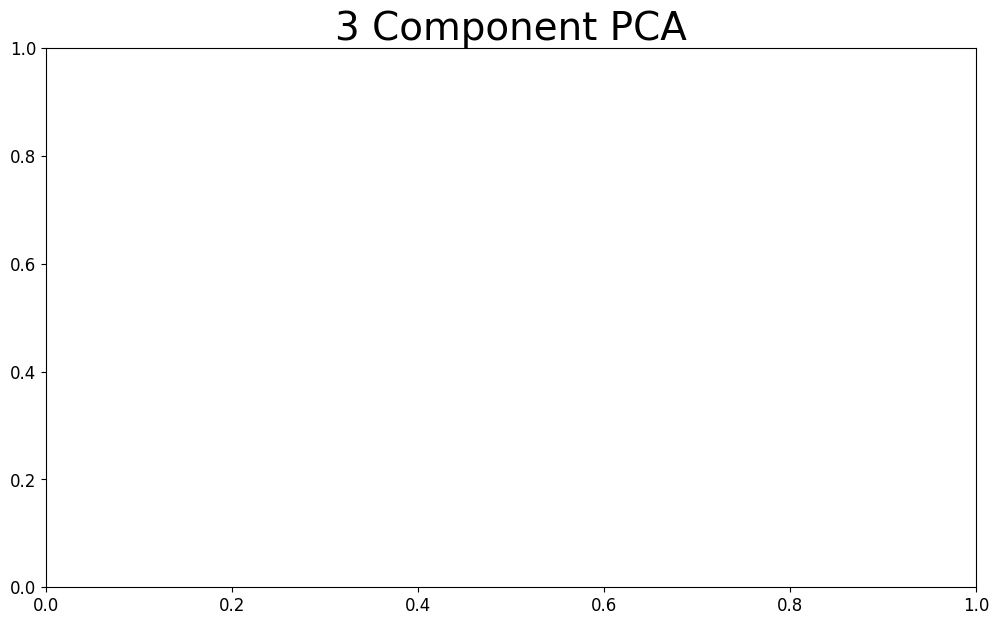

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data_pca = df_wine.copy()
data_pca = data_pca.drop(labels = ['quality','hue'],axis = 1)
data_pca = StandardScaler().fit_transform(data_pca)
pca = PCA(n_components=3)
pca_results = pca.fit_transform(data_pca)
columns = ['PC1', 'PC2','PC3']
pca_dataset = pd.DataFrame(data = pca_results, columns = columns )
pca_dataset['hue']=df_wine['hue']

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,7))
ax = Axes3D(fig)
ax.set_xlim(xmin=-8,xmax=4)
#ax.set_ylim(ymax=8)
ax.set_zlim(zmin=-4,zmax=4)
ax.set_xlabel('Component 1', fontsize = 26)
ax.set_ylabel('Component 2', fontsize = 26)
ax.set_zlabel('Component 3', fontsize = 26)
plt.title('3 Component PCA', fontsize = 28)

plt.rc('font', size=28)          # controls default text sizes
plt.rc('axes', titlesize=28)     # fontsize of the axes title
plt.rc('axes', labelsize=28)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('figure', titlesize=28)  # fontsize of the figure title

ax.scatter(pca_dataset[pca_dataset.hue == 'red'].PC1, pca_dataset[pca_dataset.hue == 'red'].PC2,
           pca_dataset[pca_dataset.hue == 'red'].PC3, c = ['red'], label='red', depthshade=True)
ax.scatter(pca_dataset[pca_dataset.hue == 'white'].PC1, pca_dataset[pca_dataset.hue == 'white'].PC2,
           pca_dataset[pca_dataset.hue == 'white'].PC3, c = ['yellow'], label='white', depthshade=True)
ax.legend()

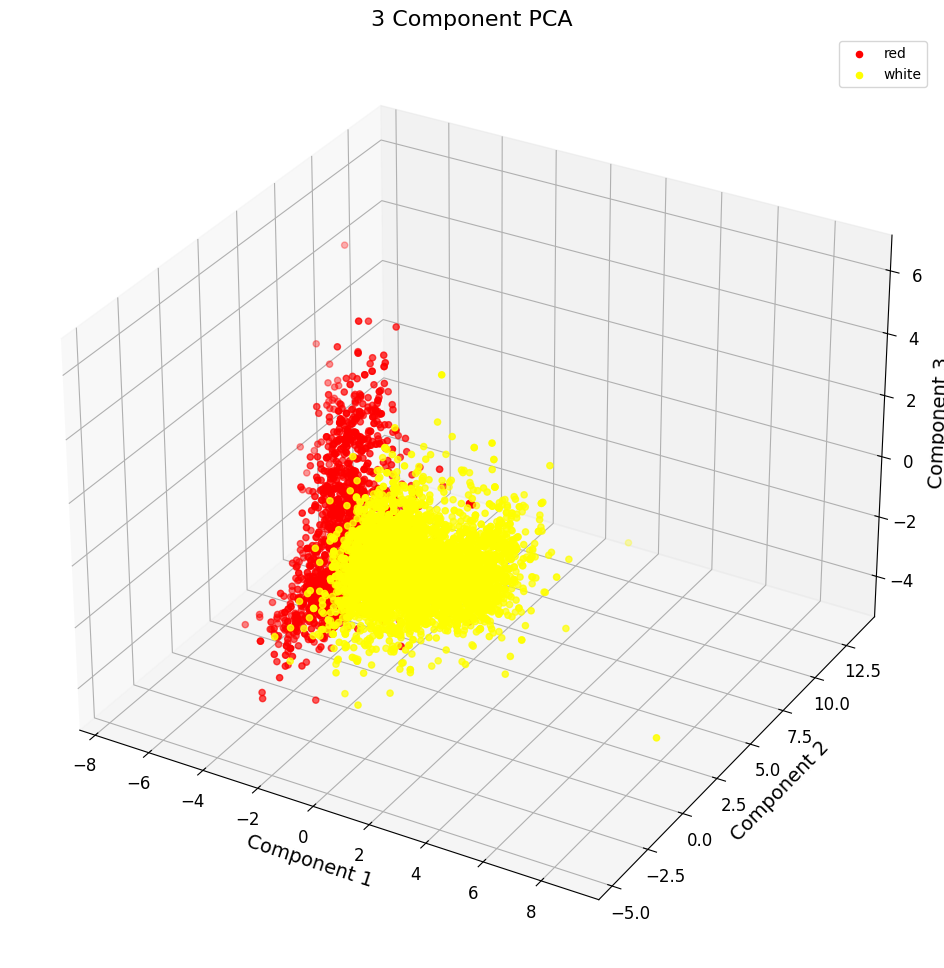

In [51]:

data_pca = df_wine.copy()
data_pca = data_pca.drop(labels=['quality', 'hue'], axis=1)
data_pca = StandardScaler().fit_transform(data_pca)
pca = PCA(n_components=3)
pca_results = pca.fit_transform(data_pca)
columns = ['PC1', 'PC2', 'PC3']
pca_dataset = pd.DataFrame(data=pca_results, columns=columns)
pca_dataset['hue'] = df_wine['hue']


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Component 1', fontsize=14)
ax.set_ylabel('Component 2', fontsize=14)
ax.set_zlabel('Component 3', fontsize=14)
plt.title('3 Component PCA', fontsize=16)

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize
plt.rc('figure', titlesize=16)   # fontsize of the figure title

colors = {'red': 'red', 'white': 'yellow'}
for h in pca_dataset['hue'].unique():
    mask = pca_dataset['hue'] == h
    ax.scatter(
        pca_dataset.loc[mask, 'PC1'],
        pca_dataset.loc[mask, 'PC2'],
        pca_dataset.loc[mask, 'PC3'],
        c=colors[h],
        label=h,
        depthshade=True
    )

ax.legend()
plt.show()


# Interactive Plot with Plotly

Using Plotly we can make an interactive 3D plot for PCA, that allows for free rotation and zooming on the graph. For more information visit [Plotly's documentation](https://plotly.com/python/3d-scatter-plots/ " 3D Scatter Plots in Python").

In [52]:
import datetime
from datetime import date
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


cf.go_offline()

def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script
  src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)


In [53]:
#configure_plotly_browser_state()

trace_red = go.Scatter3d(
  x=pca_dataset[pca_dataset.hue == 'red'].PC1, y=pca_dataset[pca_dataset.hue == 'red'].PC2, z=pca_dataset[pca_dataset.hue == 'red'].PC3,
  mode = 'markers', marker = dict(
      size = 3,
      color = "red"
      ),
    opacity=0.5,
    name='red'
)
trace_white = go.Scatter3d(
  x=pca_dataset[pca_dataset.hue == 'white'].PC1, y=pca_dataset[pca_dataset.hue == 'white'].PC2, z=pca_dataset[pca_dataset.hue == 'white'].PC3,
  mode = 'markers', marker = dict(
      size = 2,
      color = "yellow"
      ),
    opacity=0.5,
    name='white'
)

layout = go.Layout(
        title_text='3 Component PCA',
        title_x=0.45,
        legend= {'itemsizing': 'constant'},
        margin=dict(l=0, r=0, b=0, t=50),
        scene = dict(
                     xaxis = dict(nticks=4, title='Component 1',),
                     yaxis = dict(nticks=4, title='Component 2',),
                     zaxis = dict(nticks=4, title='Component 3',)
                     )
        )

enable_plotly_in_cell()
fig = go.Figure(data = [trace_red, trace_white], layout = layout)
iplot(fig)


Output hidden; open in https://colab.research.google.com to view.

# Assignment

In [54]:
red_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  hue  
0         9.4        5  red  
1         9.8        5  red  
2         9.8        5  red  
3         9.8        6  red  
4         9.4        5  red  
...       ...      ...  ...  
1594     10.5        5  red  
1595     11.2        6  red  
1596     11.0        6  red  
1597     10.2        5  red  
1598     11.0        6  red  

[1599 rows x 13 columns]

In [55]:
df1 = red_df[["pH", "fixed acidity", "volatile acidity", "citric acid"]]
df1

pH  fixed acidity  volatile acidity  citric acid
0     3.51            7.4             0.700         0.00
1     3.20            7.8             0.880         0.00
2     3.26            7.8             0.760         0.04
3     3.16           11.2             0.280         0.56
4     3.51            7.4             0.700         0.00
...    ...            ...               ...          ...
1594  3.45            6.2             0.600         0.08
1595  3.52            5.9             0.550         0.10
1596  3.42            6.3             0.510         0.13
1597  3.57            5.9             0.645         0.12
1598  3.39            6.0             0.310         0.47

[1599 rows x 4 columns]

In [56]:
df2 = white_df[["pH", "fixed acidity", "volatile acidity", "citric acid"]]
df2

pH  fixed acidity  volatile acidity  citric acid
0     3.00            7.0              0.27         0.36
1     3.30            6.3              0.30         0.34
2     3.26            8.1              0.28         0.40
3     3.19            7.2              0.23         0.32
4     3.19            7.2              0.23         0.32
...    ...            ...               ...          ...
4893  3.27            6.2              0.21         0.29
4894  3.15            6.6              0.32         0.36
4895  2.99            6.5              0.24         0.19
4896  3.34            5.5              0.29         0.30
4897  3.26            6.0              0.21         0.38

[4898 rows x 4 columns]

pH                     Axes(0.125,0.11;0.168478x0.77)
fixed acidity       Axes(0.327174,0.11;0.168478x0.77)
volatile acidity    Axes(0.529348,0.11;0.168478x0.77)
citric acid         Axes(0.731522,0.11;0.168478x0.77)
dtype: object

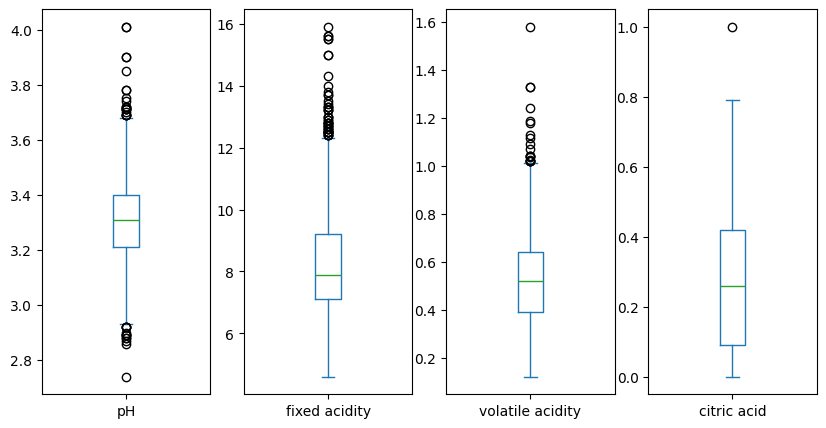

In [63]:
df1.plot(kind='box',subplots=True,layout=(1,4),figsize=(10,5))


(0.0, 20.0)

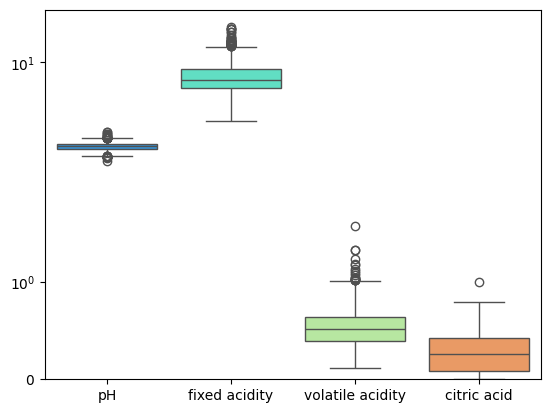

In [68]:
ax = sns.boxplot(data=df1, orient="v", palette="rainbow")
ax.set_yscale("symlog")
ax.set_ylim(ymin=0, ymax=20)

<Axes: >

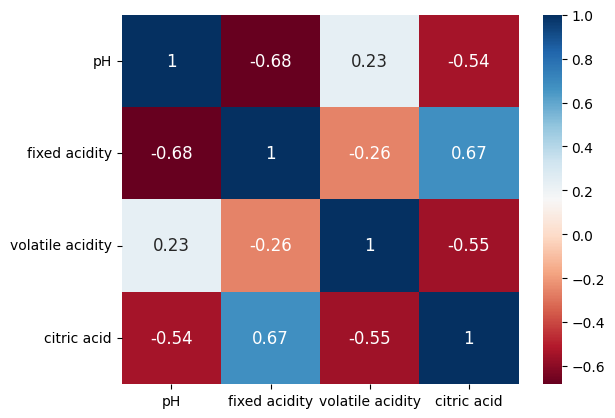

In [79]:
df1_corr = df1.corr()
sns.heatmap(data=df1_corr, annot=True, cmap="RdBu")

<Axes: >

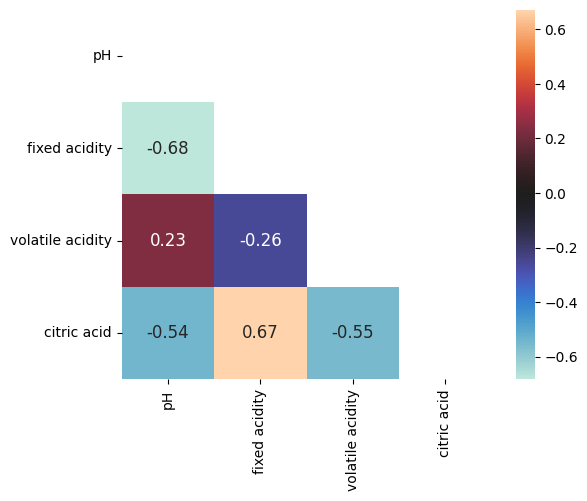

In [80]:
correlation = df1.corr()
mask_triu = np.triu(correlation)
# fig=plt.gcf()
# fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask_triu,square=True,annot=True, cmap="icefire")

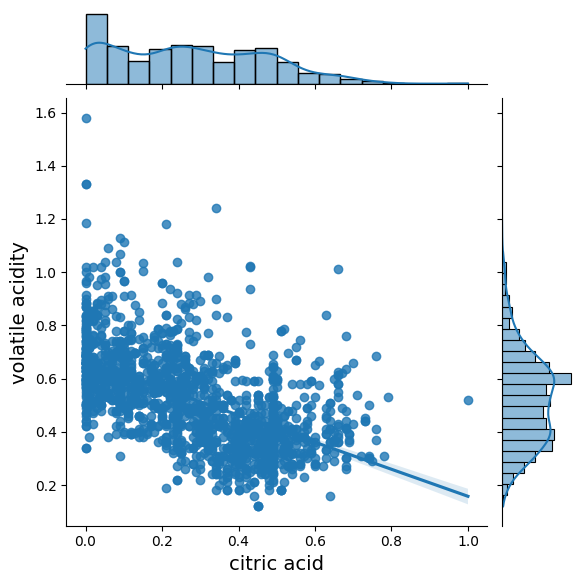

In [85]:
sns.jointplot(x="citric acid", y="volatile acidity", data=df1, kind="reg", palette="coolwarm")

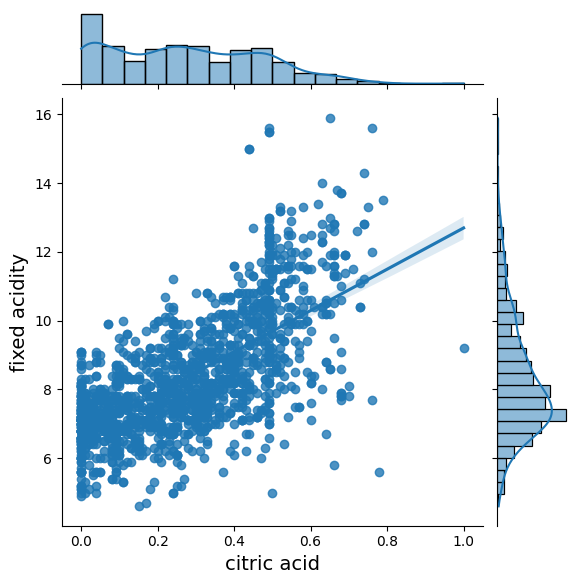

In [86]:
sns.jointplot(x="citric acid", y="fixed acidity", data=df1, kind="reg")

---
# Advanced/Research Assignments

## PCA (Principal Component Analysis) from scratch
Now let's perform a Principal Component Analysis, like the one done on Notebook 3, but from scratch, with matrix operations.

NOTE: It is strongly recommended to read the following documentations when needed:

[Numpy](https://https://numpy.org/doc/) for everything related to matrix operations.

[Pandas](https://https://pandas.pydata.org/docs/) for everything regarding DataFrame manipulation

[Python](https://https://docs.python.org/es/3/) for built-in Python functions.

[Seaborn](https://https://seaborn.pydata.org/) for visualizations.

---
To begin, we must first import the following libraries:
* Numpy: for matrix operations
* Seaborn and Matplotlib: for visualizations

Then import both wine datasets: the one for red wines and the one for white wines. After that, add a new column named "hue" that indicates the kind of wine (red or white) and concatenate both dataframes.
Name the new concatenated dataframe "df_wine"

(this is done on Notebook 3 in the Variable Reduction section).

In [88]:
df_wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality    hue  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
6492     11.2        6  white  
6493      9.6        5  white  
6494      9.4        6  white  
6495     12.8        7  white  
6496     11.8        6  white  

[6497 rows x 13 columns]

### Create a new dataframe with the normalized data:

* Generate a copy of the concatenated dataframe, drop the "quality" and "hue" columns ("quality" is dropped because it's a categorical variable and "hue" is our target variable). Use the `.drop` method. Name it "data_PCA".

* **Normalizing the data:**
Calculate the mean of data_pca (you can name it "mean") and the standard deviation of data_pca (you can name it "std") then, subtract the mean from data_pca and divide it by the standard deviation. Name the new dataframe "normalized_data_pca". Print the new dataframe on the screen.

*HINTS:*
useful methods:

`df.copy()`

`df.drop()`

`df.mean()`

`df.std()`

Pandas documentation: https://pandas.pydata.org/docs/


In [90]:
data_pca = df_wine.copy()
data_pca = data_pca.drop(labels = ['quality', 'hue'],axis = 1)
mean=data_pca.mean()
std=data_pca.std()
normalized_data_pca=(data_pca - mean)/std
normalized_data_pca

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.142462          2.188664    -2.192664       -0.744721   0.569914   
1          0.451001          3.281982    -2.192664       -0.597594   1.197883   
2          0.451001          2.553104    -1.917405       -0.660648   1.026618   
3          3.073580         -0.362411     1.660957       -0.744721   0.541370   
4          0.142462          2.188664    -2.192664       -0.744721   0.569914   
...             ...               ...          ...             ...        ...   
6492      -0.783154         -0.787590    -0.197039       -0.807775  -0.486215   
6493      -0.474615         -0.119451     0.284664        0.537383  -0.257863   
6494      -0.551750         -0.605370    -0.885185       -0.891847  -0.429127   
6495      -1.323097         -0.301671    -0.128224       -0.912866  -0.971463   
6496      -0.937423         -0.787590     0.422293       -0.975920  -1.028551   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -1.100055             -1.446247  1.034913  1.812950   
1               -0.311296             -0.862402  0.701432 -0.115064   
2               -0.874695             -1.092402  0.768128  0.258100   
3               -0.762016             -0.986248  1.101609 -0.363840   
4               -1.100055             -1.446247  1.034913  1.812950   
...                   ...                   ...       ...       ...   
6492            -0.367636             -0.420095 -1.186069  0.320294   
6493             1.491582              0.924517  0.067819 -0.426034   
6494            -0.029596             -0.083942 -0.719196 -1.421138   
6495            -0.592996             -0.101635 -2.003097  0.755652   
6496            -0.480316             -0.313942 -1.762991  0.258100   

      sulphates   alcohol  
0      0.193082 -0.915394  
1      0.999502 -0.580023  
2      0.797897 -0.580023  
3      0.327485 -0.580023  
4      0.193082 -0.915394  
...         ...       ...  
6492  -0.210128  0.593772  
6493  -0.478935 -0.747709  
6494  -0.478935 -0.915394  
6495  -1.016548  1.935253  
6496  -1.419758  1.096828  

[6497 rows x 11 columns]

### Transform the dataframe into a matrix to operate:
Transform "normalized_data_pca" into a matrix (numpy array). You should end up with an (n x 11) array, n being the sample size. Name it **C** (because this is our **C**entered data). Make sure **C** is an n x 11 array.

*HINTS:*

useful method: `df.to_numpy()`

Numpy documentation: https://numpy.org/doc/

In [92]:
C = normalized_data_pca.to_numpy()
print(C)
print(C.shape)

[[ 0.1424623   2.18866446 -2.19266376 ...  1.81294997  0.19308191
  -0.91539371]
 [ 0.45100101  3.28198234 -2.19266376 ... -0.11506417  0.99950169
  -0.58002349]
 [ 0.45100101  2.55310376 -1.9174051  ...  0.25809985  0.79789675
  -0.58002349]
 ...
 [-0.5517498  -0.60537011 -0.88518515 ... -1.42113827 -0.47893457
  -0.91539371]
 [-1.32309658 -0.3016707  -0.12822384 ...  0.75565189 -1.01654776
   1.93525315]
 [-0.93742319 -0.78758975  0.42229346 ...  0.25809985 -1.41975765
   1.0968276 ]]
(6497, 11)


### Covariance Matrix:
With Numpy, calculate the covariance matrix of $C^T$ (transposed matrix of **C**). Name the covariaince matrix **V**.

$V = cov(C^T)$

**V** should be an 11 x 11 array. Check if this is true using a method learned in Notebook 2.

 The covariance matrix is a square matrix that gives us the covariances between each pair of elements of a vector (or, in this case, each column of a matrix). Remember the covariance is the degree of joint variation of two variables with respect to their means.

*HINTS*:

useful method: `np.cov(A)` <-- generates the covariance matrix of A

Transposed matrix on Numpy: $A^T$ = `A.T `

In [96]:
cV = np.cov(C.T)
print(cV.shape)
pd.DataFrame(cV)

(11, 11)


0         1         2         3         4         5         6   \
0   1.000000  0.219008  0.324436 -0.111981  0.298195 -0.282735 -0.329054   
1   0.219008  1.000000 -0.377981 -0.196011  0.377124 -0.352557 -0.414476   
2   0.324436 -0.377981  1.000000  0.142451  0.038998  0.133126  0.195242   
3  -0.111981 -0.196011  0.142451  1.000000 -0.128940  0.402871  0.495482   
4   0.298195  0.377124  0.038998 -0.128940  1.000000 -0.195045 -0.279630   
5  -0.282735 -0.352557  0.133126  0.402871 -0.195045  1.000000  0.720934   
6  -0.329054 -0.414476  0.195242  0.495482 -0.279630  0.720934  1.000000   
7   0.458910  0.271296  0.096154  0.552517  0.362615  0.025717  0.032395   
8  -0.252700  0.261454 -0.329808 -0.267320  0.044708 -0.145854 -0.238413   
9   0.299568  0.225984  0.056197 -0.185927  0.395593 -0.188457 -0.275727   
10 -0.095452 -0.037640 -0.010493 -0.359415 -0.256916 -0.179838 -0.265740   

          7         8         9         10  
0   0.458910 -0.252700  0.299568 -0.095452  
1   0.271296  0.261454  0.225984 -0.037640  
2   0.096154 -0.329808  0.056197 -0.010493  
3   0.552517 -0.267320 -0.185927 -0.359415  
4   0.362615  0.044708  0.395593 -0.256916  
5   0.025717 -0.145854 -0.188457 -0.179838  
6   0.032395 -0.238413 -0.275727 -0.265740  
7   1.000000  0.011686  0.259478 -0.686745  
8   0.011686  1.000000  0.192123  0.121248  
9   0.259478  0.192123  1.000000 -0.003029  
10 -0.686745  0.121248 -0.003029  1.000000

### Eigendecomposition of the covariance matrix:

With Numpy, calculate the eigendecomposition of V. These are the eigenvectors and eigenvalues of V. Name them "vectors" and "values" respectively.

The eigenvectors represent the directions or components for the reduced subspace of the ultimate matrix we want to obtain, whereas the eigenvalues represent the magnitudes for the directions.

**values** should be a vector (array) of 11 components and **vectors** should be a (n x 11) matrix. Check their shapes to make sure this is correct.

*HINTS:*

`np.linalg.eig(A)` calculates the eigendecomposition of matrix A.

Useful link: [this section of the Numpy documentation]((https://https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html).)

In [101]:
values, vectors = np.linalg.eig(cV)
print(vectors)
print(values)

[[ 2.38798897e-01  3.36354536e-01 -4.34301304e-01 -3.34679266e-01
  -1.64346214e-01 -2.81267685e-01  3.44056674e-01  1.47480376e-01
   2.04553713e-01  4.01235645e-01 -2.83079440e-01]
 [ 3.80757499e-01  1.17549716e-01  3.07259420e-01 -8.47718098e-02
  -2.12784888e-01  1.52176731e-01 -4.96932675e-01 -1.51455988e-01
   4.92143072e-01 -8.74350885e-02 -3.89159756e-01]
 [-1.52388438e-01  1.83299403e-01 -5.90569674e-01  1.10895136e-03
   2.64300312e-01  2.34463340e-01 -4.02688676e-01  1.55348697e-01
  -2.27633798e-01 -2.93412336e-01 -3.81285036e-01]
 [-3.45919930e-01  3.29914181e-01  1.64688429e-01 -4.49765078e-01
  -1.67443015e-01 -1.37277329e-03  1.08003195e-01  3.53361853e-01
   2.33477754e-01 -5.24872935e-01  2.17975536e-01]
 [ 2.90112586e-01  3.15257992e-01  1.66791047e-02 -4.34375867e-02
   2.44743855e-01 -1.96630217e-01  2.96443716e-01 -6.14391068e-01
  -1.60976388e-01 -4.71516850e-01 -4.60681556e-02]
 [-4.30914008e-01  7.19325988e-02  1.34223949e-01  2.12535052e-04
   3.57278939e-01  

0         1         2         3         4         5         6   \
0   0.238799  0.336355 -0.434301 -0.334679 -0.164346 -0.281268  0.344057   
1   0.380757  0.117550  0.307259 -0.084772 -0.212785  0.152177 -0.496933   
2  -0.152388  0.183299 -0.590570  0.001109  0.264300  0.234463 -0.402689   
3  -0.345920  0.329914  0.164688 -0.449765 -0.167443 -0.001373  0.108003   
4   0.290113  0.315258  0.016679 -0.043438  0.244744 -0.196630  0.296444   
5  -0.430914  0.071933  0.134224  0.000213  0.357279  0.480243  0.366656   
6  -0.487418  0.087266  0.107462  0.062685  0.208420 -0.713663 -0.320696   
7   0.044937  0.584037  0.175606  0.715162 -0.072725 -0.003908  0.112880   
8   0.218686 -0.155869  0.455324 -0.206361  0.414551 -0.141311  0.127837   
9   0.294135  0.191716 -0.070042 -0.077202  0.640536  0.045959 -0.207764   
10  0.106437 -0.465058 -0.261101  0.335702  0.106803 -0.205053  0.251890   

          7         8         9         10  
0   0.147480  0.204554  0.401236 -0.283079  
1  -0.151456  0.492143 -0.087435 -0.389160  
2   0.155349 -0.227634 -0.293412 -0.381285  
3   0.353362  0.233478 -0.524873  0.217976  
4  -0.614391 -0.160976 -0.471517 -0.046068  
5  -0.223532  0.340051  0.207808 -0.299363  
6  -0.158134  0.151277  0.128621 -0.138910  
7   0.306561 -0.018743  0.004831 -0.046759  
8   0.453376 -0.296579 -0.028643 -0.418907  
9   0.136577  0.296926  0.165818  0.525343  
10  0.188892  0.518378 -0.399234 -0.104103

In [102]:
print(values.shape)
print(vectors.shape)

(11,)
(11, 11)


The eigenvectors can be sorted by the eigenvalues in descending order to provide a ranking of the components.

If there are eigenvalues close to zero, they represent components or axes of B that may be discarded.

Let's see this applied to the explained variances per principal component:


### Explained Variances:
Now let's calculate the explained variances per principal component. This is done by dividing each component from the eigenvalues array by the sum of said components.

Print the result on the screen. This should be an array of numbers that represent the percentage of explained variances per principal component.

If we're lucky, only one or two principal components will be responsible for the most variance in the data. The rest of the components will be close to zero.


*HINTS*:

* First create an empty list called "explained_variances"


* Make a loop so that each i value in **values** is divided by the sum of said values and append each result to the previous list.

useful method: `np.sum(A)` <-- returns the sum of the components in A


In [103]:
#Explained variance by principal component:
explained_variances = [] #Empty list

for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))

print(np.sum(explained_variances), '\n', explained_variances)


0.9999999999999999 
 [np.float64(0.27544260441423407), np.float64(0.2267114570201232), np.float64(0.1414860866419626), np.float64(0.0029846183866158965), np.float64(0.08823200715191037), np.float64(0.020699614950835252), np.float64(0.030638549581105207), np.float64(0.06544317417745861), np.float64(0.055210155535374464), np.float64(0.04559184457610455), np.float64(0.047559887564275774)]


In the previous cell, we should see an array where the first two elements are higher in value than the rest. We will consider these two are responsible for most of the variance in the data, and we will take them as our principal components.

### Generating principal components:
Now we will name our principal components
 "projected_1" and "projected_2".
* Projected_1 will be our matrix C multiplied by the first row of our **vectors** matrix.
* Projected_2 will be our matrix C multiplied by the second row of **vectors**.

Create a dataframe called "res" with projected_1 along a column named 'PC1', projected_2 along a column called 'PC2', and the type of wine (or "hue") on another column called 'Y'

You should obtain a dataframe like this one:  

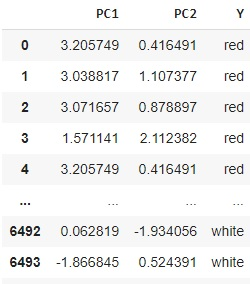


*HINTS:*

Dot product on Numpy: $A \cdot B$ = `A.dot(B)`

Remember that multiplying a matrix  $A$ by the n-th row of a matrix $B$ is the same as multiplying something by the m-th column of $B^T$

In [107]:
projected_1 = C.dot(vectors.T[0])
projected_2 = C.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = df_wine['hue']
res

PC1       PC2      Y
0     3.205749  0.416491    red
1     3.038817  1.107377    red
2     3.071657  0.878897    red
3     1.571141  2.112382    red
4     3.205749  0.416491    red
...        ...       ...    ...
6492  0.062819 -1.934056  white
6493 -1.866845  0.524391  white
6494 -0.571089 -0.722606  white
6495 -0.090045 -3.545507  white
6496 -0.512536 -2.890818  white

[6497 rows x 3 columns]

We should now have our principal components. Now let's try plotting our PCA graph:

### **Generating a visualization:**
Generate a Seaborn scatterplot that shows:

* "Column PC1" plotted on the x-axis
* "Column PC2" multiplied by n (n being the sample size) plotted on the y-axis.
* different hues on the data points for the different categories on the 'Y' column (different hue according to the type of wine).

<Axes: xlabel='PC1', ylabel='PC2'>

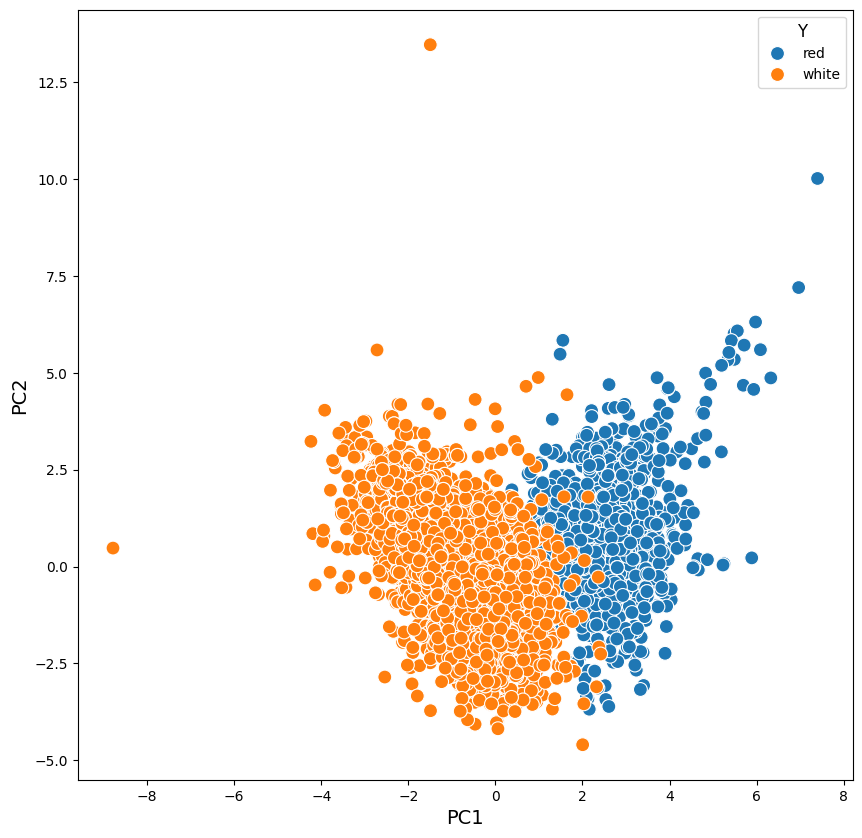

In [115]:
plt.figure(figsize=(10, 10))
#sns.scatterplot(x=res['PC1'], y=res['PC2'] * len(res), hue=res['Y'], s=100)
sns.scatterplot(x=res['PC1'], y=res['PC2'], hue=res['Y'], s=100)

<Axes: xlabel='PC1', ylabel='PC2'>

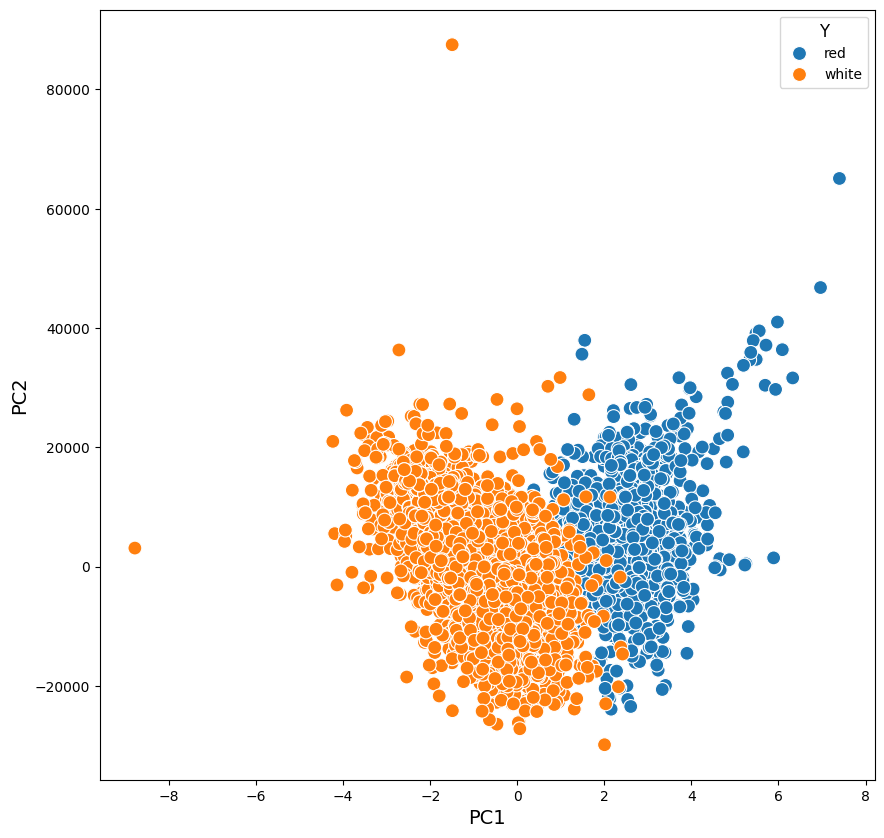

In [112]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=res['PC1'], y=res['PC2'] * len(res), hue=res['Y'], s=100)

In [123]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data_pca = df_wine.copy()
data_pca = data_pca.drop(labels = ['quality', 'hue'],axis = 1)
data_pca = StandardScaler().fit_transform(data_pca)
pca = PCA(n_components=3)
pca_results = pca.fit_transform(data_pca)


<Axes: title={'center': '2 Component PCA'}, xlabel='Component 1', ylabel='Component 2'>

<Figure size 640x480 with 0 Axes>

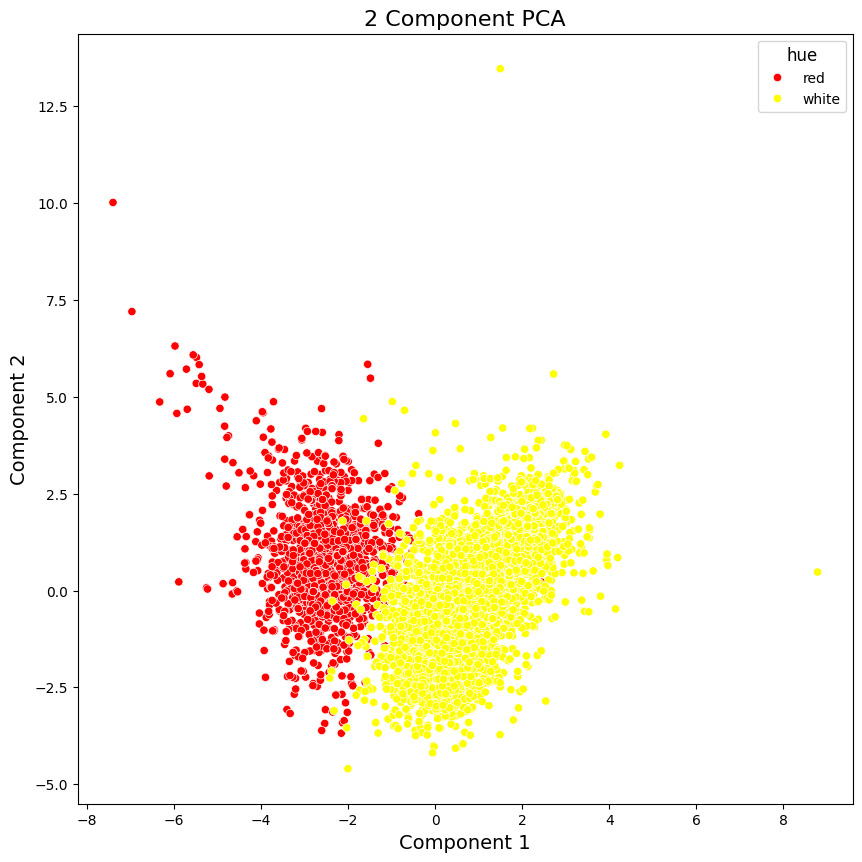

In [125]:
pca_dataset = pd.DataFrame(data = pca_results, columns = ['component1', 'component2','component3'] )
pca_dataset['hue']=df_wine['hue']
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
sns.scatterplot(x = pca_dataset['component1'], y = pca_dataset['component2'], hue=pca_dataset['hue'],
                alpha=1,palette=["red", "yellow"])

In [124]:
pca_dataset

component1  component2  component3    hue
0      -3.205996    0.416523   -2.722237    red
1      -3.039051    1.107462   -2.046952    red
2      -3.071893    0.878964   -1.742580    red
3      -1.571262    2.112545    2.592917    red
4      -3.205996    0.416523   -2.722237    red
...          ...         ...         ...    ...
6492   -0.062824   -1.934205    0.223912  white
6493    1.866989    0.524431   -0.431798  white
6494    0.571133   -0.722662    0.091469  white
6495    0.090052   -3.545780    0.141195  white
6496    0.512576   -2.891040    0.739417  white

[6497 rows x 4 columns]

## Interactive plots with IPyWidget

We will use **ipywidgets** to change the style of the PCA graphics we plotted before. In the first place, we will explore this library. We will import widgets from **ipywidgets** and display them from *Ipython.display*. Then, we will make an IntSlider. This IntSlider has an integer linear range of 0 to 100.

In [126]:
import ipywidgets as widgets
from IPython.display import display

widgets.IntSlider()

IntSlider(value=0)

In [127]:
widgets.IntSlider(value=6, min=0, max=10, step=2, description='Value:')

IntSlider(value=6, description='Value:', max=10, step=2)

There are a lot of widgets that we can use, as shown in the [documentation](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html "Widget List"). The most interesting thing about widgets is that they allow us to interact with our data and plots.

We can connect the IntSlider using the function `interact`. For example, we can print $(value\;of\;our\;IntSlider)^2$.

In [128]:
x_widget = widgets.IntSlider(value=6, min=0, max=10, step=2, description='Value:')

def printer(x):
    print(x*x)

widgets.interact(printer,x=x_widget);

interactive(children=(IntSlider(value=6, description='Value:', max=10, step=2), Output()), _dom_classes=('widg…

Now we can try something a bit more complex. For example, we can declare two dropdown widgets with `widgets.Dropdown` to choose the color and assign it to variables (e.g. redwine_color and whitewine_color).

Then, we need to define a function that generates a plot for a 2-Component PCA using the information for the color gathered in the dropdown boxes. Remember to define the x and y labels, the plot title, and make a scatterplot for red wine and white wine.

For more information on how to use **ipywidgets**, you can check [the documentation](https://ipywidgets.readthedocs.io/en/stable/ "ipywidgets").

In [131]:
redwine_color =widgets.Dropdown(options=['red','blue','green','black'],disabled=False)
whitewine_color =widgets.Dropdown(options=['blue','black','red','green'],disabled=False)

def interact_color(color_redwine, color_whitewine):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Component 1', fontsize = 15)
    ax.set_ylabel('Component 2', fontsize = 15)
    ax.set_title('2 Component PCA', fontsize = 20)
    targets = ['red', 'white']
    colors = [color_redwine,color_whitewine]
    for target, color in zip(targets,colors):
        indicesToKeep = pca_dataset['hue'] == target
        ax.scatter(pca_dataset.loc[indicesToKeep, 'component1']
               , pca_dataset.loc[indicesToKeep, 'component2']
               , c = color
               , alpha=0.3)
    ax.legend(targets)
    ax.grid()

widgets.interact(interact_color,color_redwine=redwine_color,color_whitewine=whitewine_color)


interactive(children=(Dropdown(description='color_redwine', options=('red', 'blue', 'green', 'black'), value='…

<function __main__.interact_color(color_redwine, color_whitewine)>